# **Dataset: Beijing PM2.5 Data**

- **Context**: Understand how weather and time influence air pollution in Beijing.
- **Size**: 43,824 hourly entries from 2010–2014.
- **Features**:
    - **year, month, day, hour**
    - **season, PM2.5** (μg/m³)
    - **DEWP** (dew point), **TEMP** (temperature), **PRES** (pressure)
    - **cbwd** (combined wind direction)
    - **Iws** (cumulated wind speed), **Is** (cumulated hours of snow), **Ir** (cumulated hours of rain)

## 1. Loading & Basic Inspection

##### Load beijing_pm25.csv into a DataFrame.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./dataset/beijing.csv')

##### Show first/last 5 rows.

In [3]:
df.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
df.tail(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


##### Display df.info() and check for missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


##### Report dimensions (rows × columns).

In [6]:
df.shape

(43824, 13)

##### Calculate basic stats (.describe()) for pollutants and weather.

In [7]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


## 2. Datetime & Indexing

##### Create a datetime column combining year, month, day, hour.

In [8]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [9]:
df['date_time'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':df['day'],'hour':df['hour']})

In [10]:
df['date_time']

0       2010-01-01 00:00:00
1       2010-01-01 01:00:00
2       2010-01-01 02:00:00
3       2010-01-01 03:00:00
4       2010-01-01 04:00:00
                ...        
43819   2014-12-31 19:00:00
43820   2014-12-31 20:00:00
43821   2014-12-31 21:00:00
43822   2014-12-31 22:00:00
43823   2014-12-31 23:00:00
Name: date_time, Length: 43824, dtype: datetime64[ns]

In [11]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir', 'date_time'],
      dtype='object')

##### Set it as the index (ensure hourly frequency).

In [12]:
df.set_index('date_time',inplace=True)

##### Drop redundant columns (year/day/etc.) after indexing.

In [13]:
df.drop(columns=['year','day','month','hour'],axis=1,inplace=True)

In [14]:
df.columns

Index(['No', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')

In [15]:
df.index.name

'date_time'

## 3. Missing Data Handling

##### Count and visualize (percent) of missing PM2.5 values.

In [16]:
null_sum = df['pm2.5'].isna().sum()
print(f"Missing sum : {null_sum}")

all_sum = df['pm2.5'].sum()
print(f"Total sum : {all_sum}")

percentage_of_missing_values = (null_sum/all_sum)*100
print(f"Percentage of missing values {percentage_of_missing_values}")

Missing sum : 2067
Total sum : 4117792.0
Percentage of missing values 0.05019680450105299


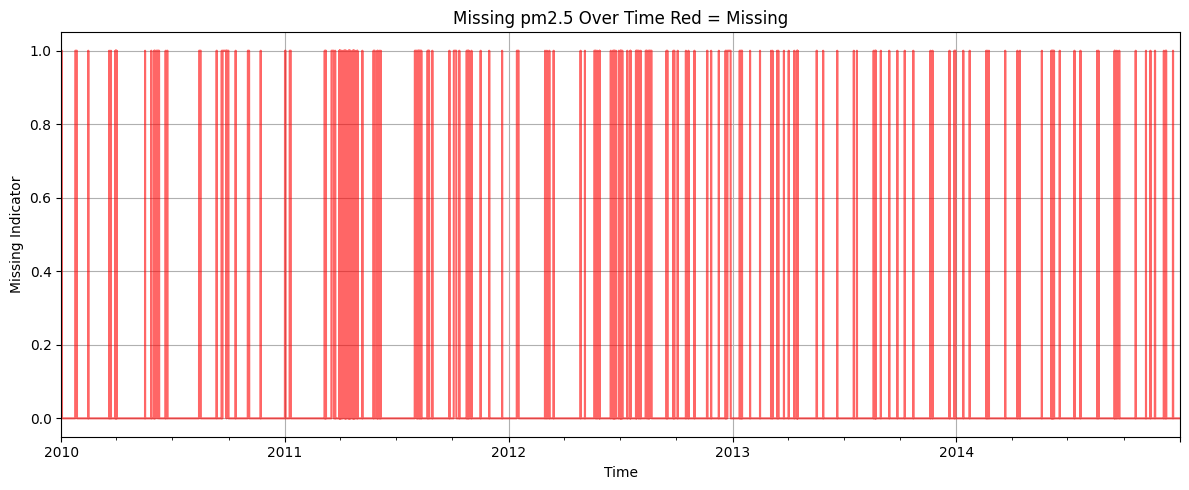

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
df['pm2.5'].isna().astype(int).plot(kind='line',color='red',alpha=0.6)
plt.title('Missing pm2.5 Over Time Red = Missing')
plt.xlabel('Time')
plt.ylabel('Missing Indicator')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Fill missing PM2.5 via:
    - Forward-fill for short gaps (≤2 hours).
    - Rolling-mean-based interpolation for longer gaps.

In [18]:
# Forward fill only 2 or fewer consecutive NaNs
df['pm2.5'] = df['pm2.5'].fillna(method='ffill', limit=2)

In [19]:
# Fill remaining NaNs with a 3-hour centered rolling mean
df['pm2.5'] = df['pm2.5'].fillna(df['pm2.5'].rolling(window=3, center=True, min_periods=1).mean())

##### 3. Verify No Remaining Nulls

In [20]:
df['pm2.5'].isnull().sum()

1610

In [21]:
daily = pd.DataFrame()

In [22]:
df.columns

Index(['No', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')

## 4. Resampling & Time Aggregation

1. Resample to **daily**:
    - Compute mean PM2.5, TEMP, DEWP, and total rain hours.

In [23]:
daily_df = pd.DataFrame()
daily_df[['pm2.5','TEMP','DEWP','Ir']] = df[['pm2.5','TEMP','DEWP','Ir']].resample('D').mean()

2. Resample to **weekly**:
    - Get average PM2.5 and max daily temperature.

In [24]:
df[['pm2.5','TEMP','DEWP','Ir']].resample('W').mean()

,pm2.5,TEMP,DEWP,Ir
date_time,,,,
2010-01-03,112.734694,-6.805556,-12.458333,0.0
2010-01-10,74.452381,-11.511905,-19.976190,0.0
2010-01-17,86.708333,-9.047619,-18.083333,0.0
2010-01-24,130.614286,-3.119048,-14.202381,0.0
2010-01-31,63.586466,-0.696429,-17.744048,0.0
...,...,...,...,...
2014-12-07,37.642857,-2.446429,-19.458333,0.0
2014-12-14,92.750000,-1.523810,-14.327381,0.0
2014-12-21,69.411043,-2.047619,-16.232143,0.0


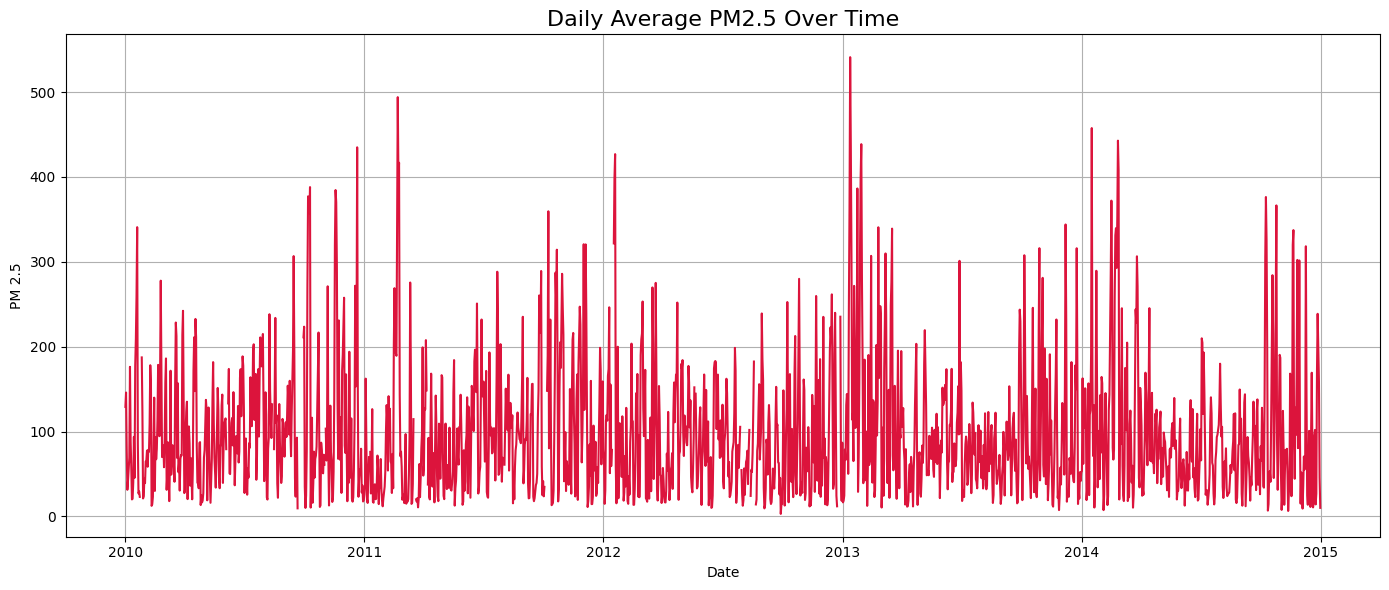

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(daily_df.index,daily_df['pm2.5'],color='crimson',linewidth=1.5)
plt.title('Daily Average PM2.5 Over Time',fontsize=16)
plt.xlabel('Date')
plt.ylabel('PM 2.5')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Filtering & Conditional Selection

##### Launch filter: days with daily PM2.5 > 150 μg/m³ (unhealthy).

In [26]:
df['unhealthy'] = df['pm2.5'] > 150

In [27]:
df['unhealthy']

date_time
2010-01-01 00:00:00    False
2010-01-01 01:00:00    False
2010-01-01 02:00:00    False
2010-01-01 03:00:00    False
2010-01-01 04:00:00    False
                       ...  
2014-12-31 19:00:00    False
2014-12-31 20:00:00    False
2014-12-31 21:00:00    False
2014-12-31 22:00:00    False
2014-12-31 23:00:00    False
Name: unhealthy, Length: 43824, dtype: bool

##### Count how many such days.

In [28]:
df['unhealthy'].value_counts()

False    34752
True      9072
Name: unhealthy, dtype: int64

In [29]:
df.columns

Index(['No', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir',
       'unhealthy'],
      dtype='object')

##### Filter hours with PM2.5 > 300 and wind speed < 1 m/s.

In [30]:
df[(df['pm2.5'] > 300) & (df['Iws'] < 1)].index

DatetimeIndex(['2010-01-17 21:00:00', '2010-01-17 23:00:00',
               '2010-01-18 19:00:00', '2010-01-18 20:00:00',
               '2010-01-18 23:00:00', '2010-01-19 10:00:00',
               '2010-01-19 12:00:00', '2010-01-19 14:00:00',
               '2010-01-19 15:00:00', '2010-01-19 17:00:00',
               ...
               '2014-12-09 12:00:00', '2014-12-09 15:00:00',
               '2014-12-09 17:00:00', '2014-12-09 22:00:00',
               '2014-12-09 23:00:00', '2014-12-10 00:00:00',
               '2014-12-10 01:00:00', '2014-12-10 04:00:00',
               '2014-12-10 05:00:00', '2014-12-15 04:00:00'],
              dtype='datetime64[ns]', name='date_time', length=554, freq=None)

##### Show weather — TEMP and PRES — for those extreme hours.

In [31]:
df[(df['pm2.5'] > 300) & (df['Iws'] < 1)][['TEMP','PRES']]

,TEMP,PRES
date_time,,
2010-01-17 21:00:00,-7.0,1027.0
2010-01-17 23:00:00,-9.0,1027.0
2010-01-18 19:00:00,-3.0,1025.0
2010-01-18 20:00:00,-2.0,1026.0
2010-01-18 23:00:00,-1.0,1026.0
...,...,...
2014-12-10 00:00:00,-1.0,1029.0
2014-12-10 01:00:00,-1.0,1029.0
2014-12-10 04:00:00,-5.0,1027.0


## 6. Categorical Encoding & Grouping

##### 1.Group by wind direction category (cbwd), get mean PM2.5.

In [32]:
df.groupby('cbwd')['pm2.5'].mean()

cbwd
NE     90.104695
NW     70.058281
SE    110.806152
cv    126.053411
Name: pm2.5, dtype: float64

##### 2. ONE-hot encode cbwd (wind direction).

In [33]:
df_new = pd.get_dummies(df,columns=['cbwd'])

In [34]:
df_new

,No,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,unhealthy,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
date_time,,,,,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,1.79,0,0,False,0,1,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,4.92,0,0,False,0,1,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,6.71,0,0,False,0,1,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,9.84,0,0,False,0,1,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,12.97,0,0,False,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,8.0,-23,-2.0,1034.0,231.97,0,0,False,0,1,0,0
2014-12-31 20:00:00,43821,10.0,-22,-3.0,1034.0,237.78,0,0,False,0,1,0,0
2014-12-31 21:00:00,43822,10.0,-22,-3.0,1034.0,242.70,0,0,False,0,1,0,0


In [35]:
df.columns

Index(['No', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir',
       'unhealthy'],
      dtype='object')

## 7. Rolling Windows & Seasonality Exploration

1. Compute a 7-day rolling mean of daily PM2.5.

In [36]:
daily_df['pm2.5_7day'] = daily_df['pm2.5'].rolling(window=7,min_periods=1).mean()

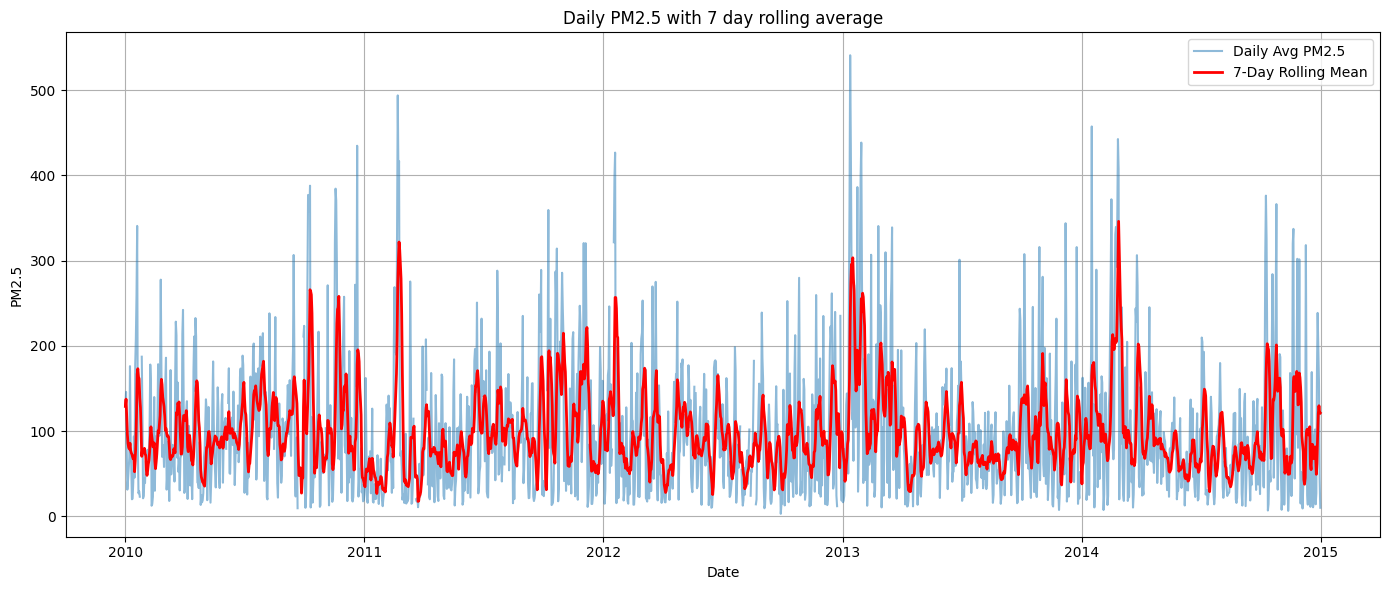

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(daily_df.index,daily_df['pm2.5'],label='Daily Avg PM2.5',alpha=0.5)
plt.plot(daily_df.index,daily_df['pm2.5_7day'],label='7-Day Rolling Mean',color='red',linewidth=2)
plt.title('Daily PM2.5 with 7 day rolling average')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Correlation & Feature Insight

##### Compute correlation matrix for daily stats (PM2.5 vs weather variables).

In [38]:
df.columns

Index(['No', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir',
       'unhealthy'],
      dtype='object')

In [39]:
df[['pm2.5', 'DEWP', 'TEMP', 'PRES','cbwd', 'Iws', 'Is', 'Ir']].corr()

/var/folders/pr/6264cydn30527m2bf6lwj2xr0000gn/T/ipykernel_7165/3335046874.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['pm2.5', 'DEWP', 'TEMP', 'PRES','cbwd', 'Iws', 'Is', 'Ir']].corr()


,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
pm2.5,1.000000,0.170549,-0.091378,-0.046474,-0.247255,0.019170,-0.051046
DEWP,0.170549,1.000000,0.824633,-0.778346,-0.296399,-0.034410,0.125090
TEMP,-0.091378,0.824633,1.000000,-0.826690,-0.154623,-0.092601,0.049121
PRES,-0.046474,-0.778346,-0.826690,1.000000,0.185355,0.069028,-0.079843
Iws,-0.247255,-0.296399,-0.154623,0.185355,1.000000,0.021883,-0.010122
Is,0.019170,-0.034410,-0.092601,0.069028,0.021883,1.000000,-0.009548
Ir,-0.051046,0.125090,0.049121,-0.079843,-0.010122,-0.009548,1.000000


In [40]:
corr_matrix = df[['pm2.5', 'DEWP', 'TEMP', 'PRES','cbwd', 'Iws', 'Is', 'Ir']].corr()

corr_unstacked = corr_matrix.abs().unstack()

corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]

corr_sorted = corr_unstacked.sort_values(ascending=False)

/var/folders/pr/6264cydn30527m2bf6lwj2xr0000gn/T/ipykernel_7165/794984659.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[['pm2.5', 'DEWP', 'TEMP', 'PRES','cbwd', 'Iws', 'Is', 'Ir']].corr()


##### Highlight the three strongest associations.

In [41]:
corr_sorted.head(3)

PRES  TEMP    0.826690
TEMP  PRES    0.826690
      DEWP    0.824633
dtype: float64

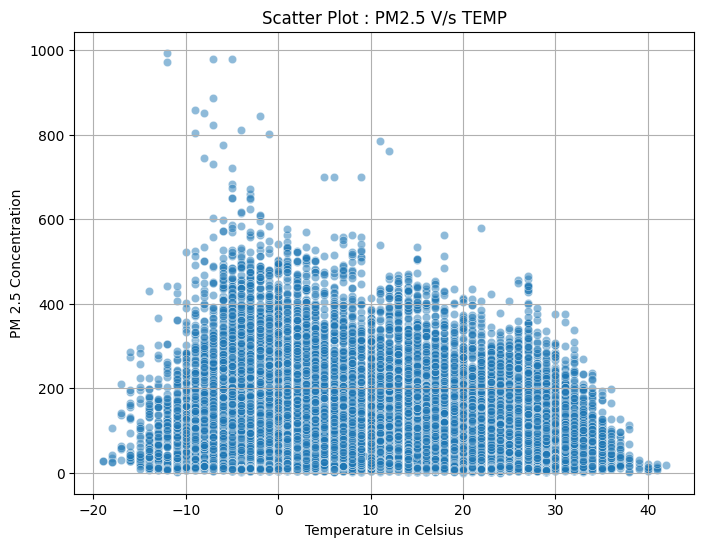

📈 Pearson Correlation Coefficient (PM2.5 vs TEMP): -0.091
📊 P-value: 5.867e-79


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df_clean = df[['pm2.5','TEMP']].dropna()

plt.figure(figsize=(8,6))

sns.scatterplot(data=df_clean,x='TEMP',y='pm2.5',alpha=0.5)

plt.title('Scatter Plot : PM2.5 V/s TEMP')
plt.xlabel('Temperature in Celsius')
plt.ylabel('PM 2.5 Concentration')
plt.grid(True)
plt.show()

# Compute Pearson correlation
corr_coef, p_value = pearsonr(df_clean['TEMP'], df_clean['pm2.5'])

print(f"📈 Pearson Correlation Coefficient (PM2.5 vs TEMP): {corr_coef:.3f}")
print(f"📊 P-value: {p_value:.3e}")

## 9. **Air Quality Flag & Advanced Grouping**

### 1. Add `aqi_category` based on PM2.5 thresholds:
#####    - *Good* (0–50), *Moderate* (51–100), *Unhealthy* (101–150), *Very‑Unhealthy* (151–250), *Hazardous* (>250).

In [43]:
import pandas as pd

# Define bins and labels
bins = [0, 50, 100, 150, 250, float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy', 'Very-Unhealthy', 'Hazardous']

# Create new column based on PM2.5 thresholds
df['aqi_category'] = pd.cut(df['pm2.5'], bins=bins, labels=labels, right=True)

# Preview the result
print(df[['pm2.5', 'aqi_category']].head(100))


                     pm2.5 aqi_category
date_time                              
2010-01-01 00:00:00    NaN          NaN
2010-01-01 01:00:00    NaN          NaN
2010-01-01 02:00:00    NaN          NaN
2010-01-01 03:00:00    NaN          NaN
2010-01-01 04:00:00    NaN          NaN
...                    ...          ...
2010-01-04 23:00:00   31.0         Good
2010-01-05 00:00:00   30.0         Good
2010-01-05 01:00:00   34.0         Good
2010-01-05 02:00:00   27.0         Good
2010-01-05 03:00:00   25.0         Good

[100 rows x 2 columns]


In [44]:
df['pm2.5']

date_time
2010-01-01 00:00:00     NaN
2010-01-01 01:00:00     NaN
2010-01-01 02:00:00     NaN
2010-01-01 03:00:00     NaN
2010-01-01 04:00:00     NaN
                       ... 
2014-12-31 19:00:00     8.0
2014-12-31 20:00:00    10.0
2014-12-31 21:00:00    10.0
2014-12-31 22:00:00     8.0
2014-12-31 23:00:00    12.0
Name: pm2.5, Length: 43824, dtype: float64